In [5]:
#!pip install -q transformers

from transformers import pipeline

# TODO: input way to grab lyrics

In [306]:
lyrics = "First of March, it's clear to me There's something that's uncomforting Your body has a way with me But I'm exactly where I wanna be But I'm a long way from home I know your voice, I know your face This is something I cannot replace Give me hope and give me doubt Well I loved you then but I don't love you now I'm a long way from home 'Cause we're a long way from home No listen now, don't walk away I've got nothing more to say Can you see it in my dying face You're acting like I care Now is there anything that I can do If there was would we be singing 'Cause, you're a part of me and I'm a part of you 'Cause, you're a part of me and I'm a part of you 'Cause, you're a part of me and I'm a part of you 'Cause, you're a part of me and I'm a part of you"

In [316]:
lyrics = '''It might seem crazy what I am 'bout to say
Sunshine, she's here, you can take a break
I'm a hot air balloon that could go to space
With the air, like I don't care, baby by the way
Huh (Because I'm happy)
Clap along if you feel like a room without a roof
(Because I'm happy)
Clap along if you feel like happiness is the truth
(Because I'm happy)
Clap along if you know what happiness is to you
(Because I'm happy)
Clap along if you feel like that's what you wanna do
Here come bad news talking this and that (Yeah)
Well give me all you got, don't hold back (Yeah)
Well I should probably warn you I'll be just fine (Yeah)
No offense to you don't waste your time
Here's why
Clap along if you feel like a room without a roof
(Because I'm happy)
Clap along if you feel like happiness is the truth
(Because I'm happy)
Clap along if you know what happiness is to you
(Because I'm happy)
Clap along if you feel like that's what you wanna do
Uh, bring me down
Can't nothing, bring me down
My level's too high to bring me down
Can't nothing, bring me down, I said
Bring me down, can't nothing
Bring me down
My level's too high to bring me down
Can't nothing, bring me down, I said
Clap along if you feel like a room without a roof
(Because I'm happy)
Clap along if you feel like happiness is the truth
(Because I'm happy)
Clap along if you know what happiness is to you
(Because I'm happy)
Clap along if you feel like that's what you wanna do
Clap along if you feel like a room without a roof
(Because I'm happy)
Clap along if you feel like happiness is the truth
(Because I'm happy)
Clap along if you know what happiness is to you
(Because I'm happy)
Clap along if you feel like that's what you wanna do
Uh, bring me down (Happy, happy, happy, happy)
Can't nothing (Happy, happy, happy, happy)
Bring me down, my level's too high
To bring me down (Happy, happy, happy, happy)
Can't nothing (Happy, happy, happy, happy)
Bring me down, I said
Clap along if you feel like a room without a roof
(Because I'm happy)
Clap along if you feel like happiness is the truth
(Because I'm happy)
Clap along if you know what happiness is to you (ayy, ayy, ayy)
(Because I'm happy)
Clap along if you feel like that's what you wanna do
Clap along if you feel like a room without a roof
(Because I'm happy)
Clap along if you feel like happiness is the truth
(Because I'm happy)
Clap along if you know what happiness is to you (hey)
(Because I'm happy)
Clap along if you feel like that's what you wanna do'''

lyrics = lyrics.replace('\n', ' ')

# if lyrics length is over 512 just take the first 512
if len(lyrics) > 512:
  lyrics = lyrics[:512]

print(lyrics)

It might seem crazy what I am 'bout to say Sunshine, she's here, you can take a break I'm a hot air balloon that could go to space With the air, like I don't care, baby by the way Huh (Because I'm happy) Clap along if you feel like a room without a roof (Because I'm happy) Clap along if you feel like happiness is the truth (Because I'm happy) Clap along if you know what happiness is to you (Because I'm happy) Clap along if you feel like that's what you wanna do Here come bad news talking this and that (Yeah


In [317]:
classifier = pipeline("text-classification",model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True)
prediction = classifier(lyrics, )

max_score = 0
max_label = ""
for i in prediction[0]:
  if i['score'] > max_score:
    max_score = i['score']
    max_label = i['label']

print(max_label, max_score)

# output second most likely emotion
second_max_score = 0
second_max_label = ""
for i in prediction[0]:
  if i['score'] > second_max_score and i['score'] < max_score:
    second_max_score = i['score']
    second_max_label = i['label']

print(second_max_label, second_max_score)


c:\Users\steph\anaconda3\envs\main\Lib\site-packages\transformers\pipelines\text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


joy 0.998480498790741
sadness 0.0005819157231599092


Gives either: sadness, joy, love, anger, fear, surprise

In [318]:
# Colour channel ranges - can adjust these
blue_ranges = [(0, 50), (0, 150), (150, 255)]
purple_ranges = [(100, 255), (0, 50), (100, 255)]
red_ranges = [(150, 255), (0, 50), (0, 50)]
orange_ranges = [(200, 255), (50, 150), (0, 50)]
yellow_ranges = [(200, 255), (200, 255), (0, 50)]
green_ranges = [(0, 50), (150, 255), (0, 50)]

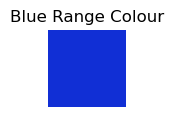

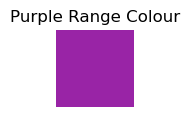

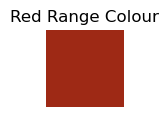

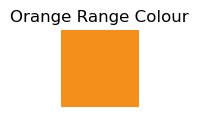

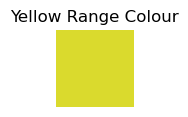

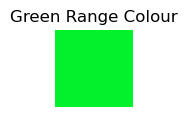

In [319]:
import random

# This is just to create a random colour for testing
# not part of the actual code.
def generate_random_colour(channel_ranges):
    random_values = []

    for channel_range in channel_ranges:
        random_channel_value = random.randint(channel_range[0], channel_range[1])
        random_values.append(random_channel_value)

    return tuple(random_values)

# Example
random_blue_colour = generate_random_colour(blue_ranges)
random_purple_colour = generate_random_colour(purple_ranges)
random_red_colour = generate_random_colour(red_ranges)
random_orange_colour = generate_random_colour(orange_ranges)
random_yellow_colour = generate_random_colour(yellow_ranges)
random_green_colour = generate_random_colour(green_ranges)

import matplotlib.pyplot as plt

def display_colour(colour, colour_name):
    plt.figure(figsize=(1, 1))  # Set the figure size to be smaller (1 inch by 1 inch)
    plt.title(colour_name + ' Range Colour')
    plt.imshow([[colour]], extent=[0, 1, 0, 1], aspect='auto')
    plt.axis('off')
    plt.show()


display_colour(random_blue_colour, 'Blue')
display_colour(random_purple_colour, 'Purple')
display_colour(random_red_colour, 'Red')
display_colour(random_orange_colour, 'Orange')
display_colour(random_yellow_colour, 'Yellow')
display_colour(random_green_colour, 'Green')



In [288]:
#based on the main emotion and secondary emotion provide the two ranges
# Set baseline colourset, brightness range and ripple characteristics (i.e. how quick or slow)

match max_label:
    case "sadness":
        base_colour = blue_ranges
        brightness_range = (0.5, 1.0)
        ripple_speed = 0.5
    case "joy":
        base_colour = yellow_ranges
        brightness_range = (0.7, 1.0)
        ripple_speed = 1.0
    case "anger":
        base_colour = red_ranges
        brightness_range = (0.5, 1.0)
        ripple_speed = 0.5
    case "fear":
        base_colour = purple_ranges
        brightness_range = (0.5, 1.0)
        ripple_speed = 0.5
    case "love":
        base_colour = orange_ranges
        brightness_range = (0.7, 1.0)
        ripple_speed = 1.0
    case "surprise":
        base_colour = green_ranges
        brightness_range = (0.7, 1.0)
        ripple_speed = 1.0
    case _:
        base_colour = yellow_ranges
        brightness_range = (0.7, 1.0)
        ripple_speed = 1.0
    
match second_max_label:
    case "sadness": # blue + purple
        secondary_colour = blue_ranges
    case "joy":
        secondary_colour = yellow_ranges
    case "anger": # red + orange
        secondary_colour = red_ranges
    case "fear":
        secondary_colour = green_ranges
    case "love": # yellow + green
        secondary_colour = orange_ranges
    case "surprise": #orange + yellow
        secondary_colour = green_ranges
    case _:
        secondary_colour = yellow_ranges

print(base_colour, secondary_colour, brightness_range, ripple_speed)

[(0, 50), (0, 150), (150, 255)] [(200, 255), (50, 150), (0, 50)] (0.5, 1.0) 0.5
